In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
transform = transforms.ToTensor()

batch_size = 128

trainset = torchvision.datasets.MNIST(
    root="../data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2
)

testset = torchvision.datasets.MNIST(
    root="../data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2
)

print("trainset:", len(trainset))
print("testset:", len(testset))


trainset: 60000
testset: 10000


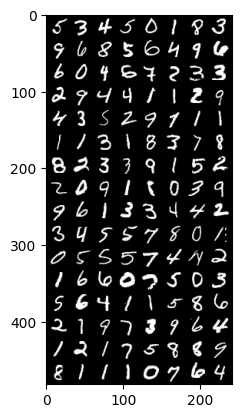

5 3 4 5 0 1 8 3 9 6 8 5 6 4 9 6 6 0 4 6 7 2 3 3 2 9 4 4 1 1 2 9 4 3 5 2 9 1 1 1 1 1 3 1 8 3 7 8 8 2 3 3 9 1 5 2 2 0 9 1 8 0 3 9 9 6 1 3 3 4 4 2 3 4 5 5 7 8 0 1 0 5 5 5 7 4 4 2 1 6 6 0 7 5 0 3 5 6 4 1 1 5 8 6 2 7 9 7 3 9 6 4 1 2 1 7 5 8 8 9 8 1 1 1 0 7 6 4


In [3]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

# print labels
print(' '.join(f'{classes[labels[j]]}' for j in range(batch_size)))

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.25)

        self.conv2 = nn.Conv2d(32, 32, 3)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.dropout2 = nn.Dropout(0.25)

        self.fc = nn.Linear(5 * 5 * 32, 10)

    def forward(self, x):
        x = self.pool1(nn.functional.relu(self.bn1(self.conv1(x))))
        x = self.dropout1(x)
        x = self.pool2(nn.functional.relu(self.bn2(self.conv2(x))))
        x = self.dropout2(x)

        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

In [5]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model = model.cuda()

In [6]:
train_results = {
    "x": [],
    "y": [],
}

MAX_EPOCHS = 50

for epoch in range(MAX_EPOCHS):
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    loss = running_loss / len(trainloader)
    train_results["x"].append(epoch)
    train_results["y"].append(round(loss, 4))
    print(f'Epoch {epoch} completed, Loss: {running_loss / len(trainloader)}')

print('Finished Training')

Epoch 0 completed, Loss: 0.25536856693086596
Epoch 1 completed, Loss: 0.09097732191702831
Epoch 2 completed, Loss: 0.07258294788854462
Epoch 3 completed, Loss: 0.06168561017136775
Epoch 4 completed, Loss: 0.05691261588732825
Epoch 5 completed, Loss: 0.0534116254885123
Epoch 6 completed, Loss: 0.048135382388390775
Epoch 7 completed, Loss: 0.04664969394035113
Epoch 8 completed, Loss: 0.043401474337170974
Epoch 9 completed, Loss: 0.04221555750036656
Epoch 10 completed, Loss: 0.04104783590277359
Epoch 11 completed, Loss: 0.03705502287305987
Epoch 12 completed, Loss: 0.03722162095945019
Epoch 13 completed, Loss: 0.03486610344623023
Epoch 14 completed, Loss: 0.03280690686900351
Epoch 15 completed, Loss: 0.03274035422719205
Epoch 16 completed, Loss: 0.03018390033135949
Epoch 17 completed, Loss: 0.03240697192964452
Epoch 18 completed, Loss: 0.03085935548313264
Epoch 19 completed, Loss: 0.029663262376710693
Epoch 20 completed, Loss: 0.02815783717088711
Epoch 21 completed, Loss: 0.02774491044655

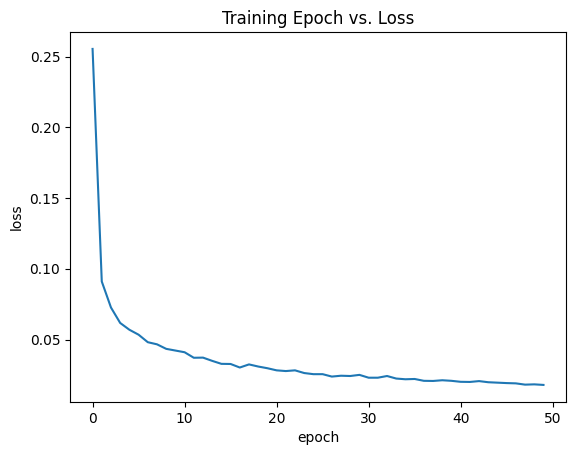

In [14]:
plt.plot(train_results["x"], train_results["y"])
plt.title("Training Epoch vs. Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [8]:
model.eval()

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.25, inplace=False)
  (fc): Linear(in_features=800, out_features=10, bias=True)
)

In [9]:
results = {}
train_loss = 0
train_correct = 0

with torch.no_grad():
    for data, target in trainloader:
        data = data.cuda()
        output = model(data)

        target = target.cuda()

        train_loss += criterion(output, target).item()
        pred = output.argmax(dim=1)
        train_correct += pred.eq(target.view_as(pred)).sum().item()

train_loss /= len(trainloader)
train_accuracy = 100. * train_correct / len(trainloader.dataset)

results["train"] = { "accuracy": train_accuracy, "loss": train_loss }

In [10]:
test_loss = 0
test_correct = 0

with torch.no_grad():
    for data, target in testloader:
        data = data.cuda()
        output = model(data)

        target = target.cuda()

        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1)
        test_correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(testloader)
test_accuracy = 100. * test_correct / len(testloader.dataset)

results["test"] = { "accuracy": test_accuracy, "loss": test_loss }

In [11]:
results_df = pd.DataFrame(results)
results_df

,train,test
accuracy,99.868333,99.190000
loss,0.005250,0.025501


In [12]:
test_accuracy

99.19

In [15]:
torch.save(model.state_dict(), f"../models/mnist_classifier_acc{test_accuracy:.2f}.pt")